# Introdução

## I. Sobre o Negócio

## Progresso de Vacinação Contra Covid-19 no Mundo

## *Contexto*

COVID-19, do inglês *Coronavirus Disease 2019*, é uma doença contagiosa causada pelo vírus SARS-CoV-2. Seu surgimento foi oficialmente catalogado em Dezembro de 2019, em Wuhan, China. Desde então, o COVID-19 se espalha pelo globo, afetando pessoas de mais de 100 países. Em 11 de março de 2020, a Organização Mundial de Saúde (OMS) classificou oficialmente a doença como um caso de pandemia.

Diversas são as medidas adotadas em busca de combater o Covid-19 no mundo. Dentre as mais eficazes está a vacinação de pessoas em massa. Diferentes modelos de vacinas foram desenvolvidas até então. Cada vacina emprega uma técnica/tecnologia diferente, com a possibilidade de imunização contra o vírus SARS-CoV-2 após uma ou duas doses, a depender das peculiaridades da vacina. Contudo, o propósito da vacinação é único: combater a pandemia de coronavírus.

Nesse sentido, busca-se compreender melhor como a vacinação tem sido realizada no mundo. O presente projeto visa realizar a coleta, a limpeza e a análise exploratória de dados (AED) sobre dados de vacinação contra Covid-19 pelo mundo.

<img align="center" src="https://upload.wikimedia.org/wikipedia/commons/8/82/SARS-CoV-2_without_background.png" alt="Exemplo de Eucalipto" title="Exemplo de Eucalipto" hspace="5" width="300"/>

## II. Coleta e Natureza dos Dados

Obteve-se os dados do Kaggle: https://www.kaggle.com/gpreda/covid-world-vaccination-progress

Trata-se de um arquivo no formato *csv* disponibilizado ao público diariamente, que consolida diversas informações acerca da vacinação contra Covid-19 no mundo. Os dados são do período de 13/12/2020 a 03/04/2021.

# AED Covid-19

# 1. Importação das Bibliotecas

In [25]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
#conda install -c plotly plotly-orca

# 2. Preparação dos Dados

In [26]:
data = pd.read_csv('country_vaccinations.csv', delimiter=',')
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


Diversos missing values encontrados, mas apenas nas colunas com valores numéricos: vamos tratá-los.

# 3. Análise Exploratória de Dados (AED)

- Primeiramente olharemos para as colunas (features) e os seus tipos de dados, tratando-os se necessário;
- Em seguida, olhamos para as linhas, tratamos os *missing values* e os dados redundantes;
- Analisamos os dados numéricos;
- Analisamos os dados categóricos;
- Finalizamos a última etapa da EAD com as agregações de dados necessárias.

## 3.1. Informações Colunas

In [27]:
data.shape

(9576, 15)

In [28]:
data['date'] = pd.to_datetime(data['date'])
data.dtypes

country                                        object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
daily_vaccinations_raw                        float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
daily_vaccinations_per_million                float64
vaccines                                       object
source_name                                    object
source_website                                 object
dtype: object

## 3.2. Informações Linhas

In [29]:
# 3.2.1. change numerical NANs to zero
data.isnull().sum()
data = data.fillna(0)
data.isnull().sum()

# 3.2.2. rename countries
data['country'] = data['country'].replace({'Czechia': 'Czech Republic', 
                                           'United Kingdom': 'UK_remove', 
                                           'United States': 'USA', 
                                           'North Macedonia': 'Macedonia'})

# 3.2.3. adjust redundant data: United Kingdom countries data
data = data.drop(data[data['country'] == 'UK_remove'].index)

data['country'] = np.where(data['country'].isin(['England', 'Falkland Islands', 'Guernsey',
                                     'Jersey', 'Northern Ireland', 'Saint Helena',
                                     'Scotland', 'Turks and Caicos Islands', 'Wales']), 
                              'UK', 
                              data['country'])

data.sample(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
6433,UK,OWID_NIR,2021-03-09,648028.0,601101.0,46927.0,6907.0,9307.0,34.22,31.74,2.48,4915.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
4525,Italy,ITA,2021-03-05,5244090.0,3635966.0,1608124.0,201985.0,154190.0,8.67,6.01,2.66,2550.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Extraordinary commissioner for the Covid-19 em...,https://github.com/italia/covid19-opendata-vac...
7348,Russia,RUS,2021-03-26,0.0,0.0,0.0,0.0,271820.0,0.00,0.00,0.00,1863.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
303,Argentina,ARG,2021-01-08,107542.0,0.0,0.0,0.0,10519.0,0.24,0.00,0.00,233.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3629,UK,GGY,2021-03-18,0.0,0.0,0.0,0.0,307.0,0.00,0.00,0.00,4579.0,Pfizer/BioNTech,Government of Guernsey,https://covid19.gov.gg/guidance/vaccine
3398,Greece,GRC,2021-01-29,253363.0,220621.0,32742.0,19078.0,15641.0,2.43,2.12,0.31,1501.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://www.data.gov.gr/datasets/mdg_emvolio/
7436,UK,SHN,2021-03-15,3107.0,3107.0,0.0,0.0,75.0,51.18,51.18,0.00,12354.0,Oxford/AstraZeneca,Government of Saint Helena,https://www.sainthelena.gov.sh/2021/news/vacci...
6186,New Zealand,NZL,2021-03-18,0.0,0.0,0.0,0.0,1398.0,0.00,0.00,0.00,290.0,Pfizer/BioNTech,Ministry of Health,https://www.nzherald.co.nz/nz/politics/covid-1...
2741,Estonia,EST,2021-01-23,25704.0,0.0,0.0,1508.0,1106.0,1.94,0.00,0.00,834.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",National Health Board,https://www.terviseamet.ee/et/uudised/covid-19...
2411,Dominica,DMA,2021-03-18,0.0,0.0,0.0,0.0,178.0,0.00,0.00,0.00,2473.0,Oxford/AstraZeneca,Government of Dominica,https://www.facebook.com/MinistryOfHealthDomin...


## 3.3. Visualização Dados Numéricos

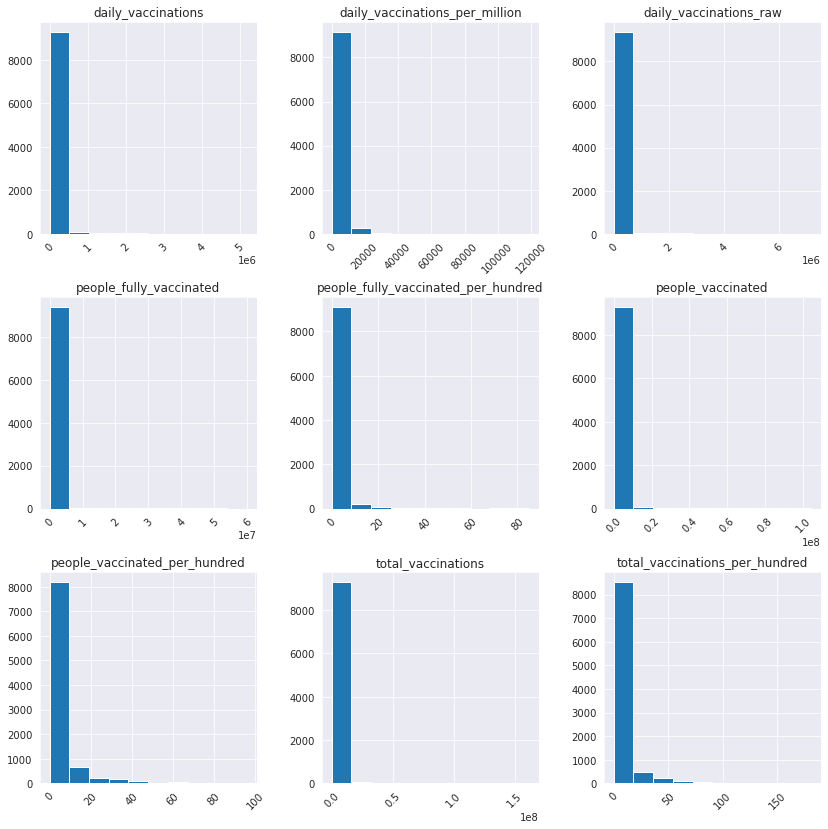

In [30]:
data.hist(figsize=(14,14), xrot=45)
plt.show()

## 3.4. Resumo Dados Numéricos

In [31]:
data.describe()/1000000 # in millions

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,0.009465,0.009465,0.009465,0.009465,0.009465,9.465000e-03,9.465000e-03,9.465000e-03,0.009465
mean,1.806202,1.164922,0.399690,0.053167,0.062812,6.769651e-06,4.443125e-06,1.574360e-06,0.002759
std,9.320660,5.882847,2.738610,0.290431,0.261645,1.621511e-05,1.030207e-05,5.778084e-06,0.004980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000886,0.000000e+00,0.000000e+00,0.000000e+00,0.000322
50%,0.021177,0.005039,0.000000,0.000000,0.005348,3.600000e-07,5.000000e-08,0.000000e+00,0.001353
75%,0.502078,0.309741,0.035479,0.014043,0.025510,6.050000e-06,3.880000e-06,7.600000e-07,0.003355
max,161.688422,104.213478,59.858146,7.185000,5.190143,1.807800e-04,9.585000e-05,8.493000e-05,0.118759


Destaca-se que não há valores negativos, o que seria ruidoso neste projeto.

## 3.5. Correlação Dados Numéricos

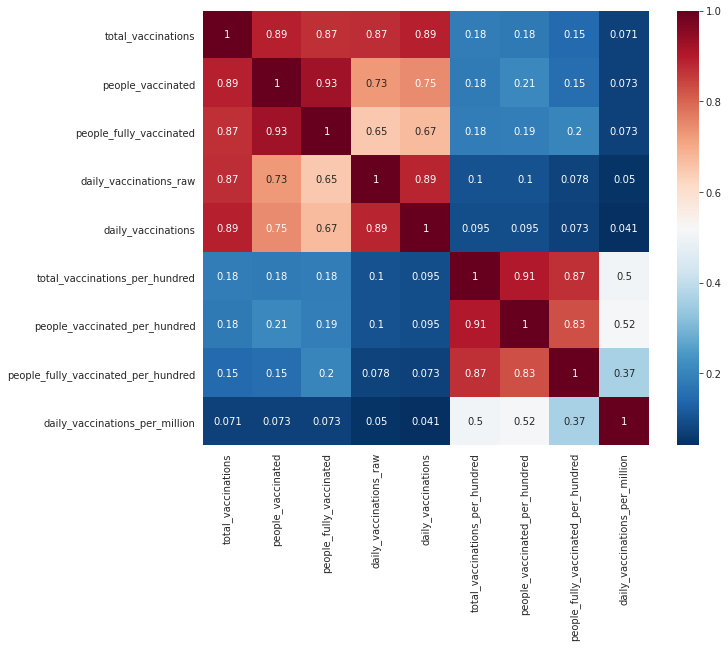

In [32]:
corrs = data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

## 3.6. Resumo Dados Categóricos

In [33]:
data.describe(include=['object', 'datetime']) # 'first' and 'last' are about 'date', only 

,country,iso_code,date,vaccines,source_name,source_website
count,9465,9465,9465,9465,9465,9465
unique,157,165,112,27,98,162
top,UK,OWID_SCT,2021-03-18 00:00:00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://coronavirus.data.gov.uk/details/health...
freq,733,111,145,2255,3119,444
first,NaN,NaN,2020-12-13 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2021-04-03 00:00:00,NaN,NaN,NaN


## 3.7. Visualização Dados Categóricos

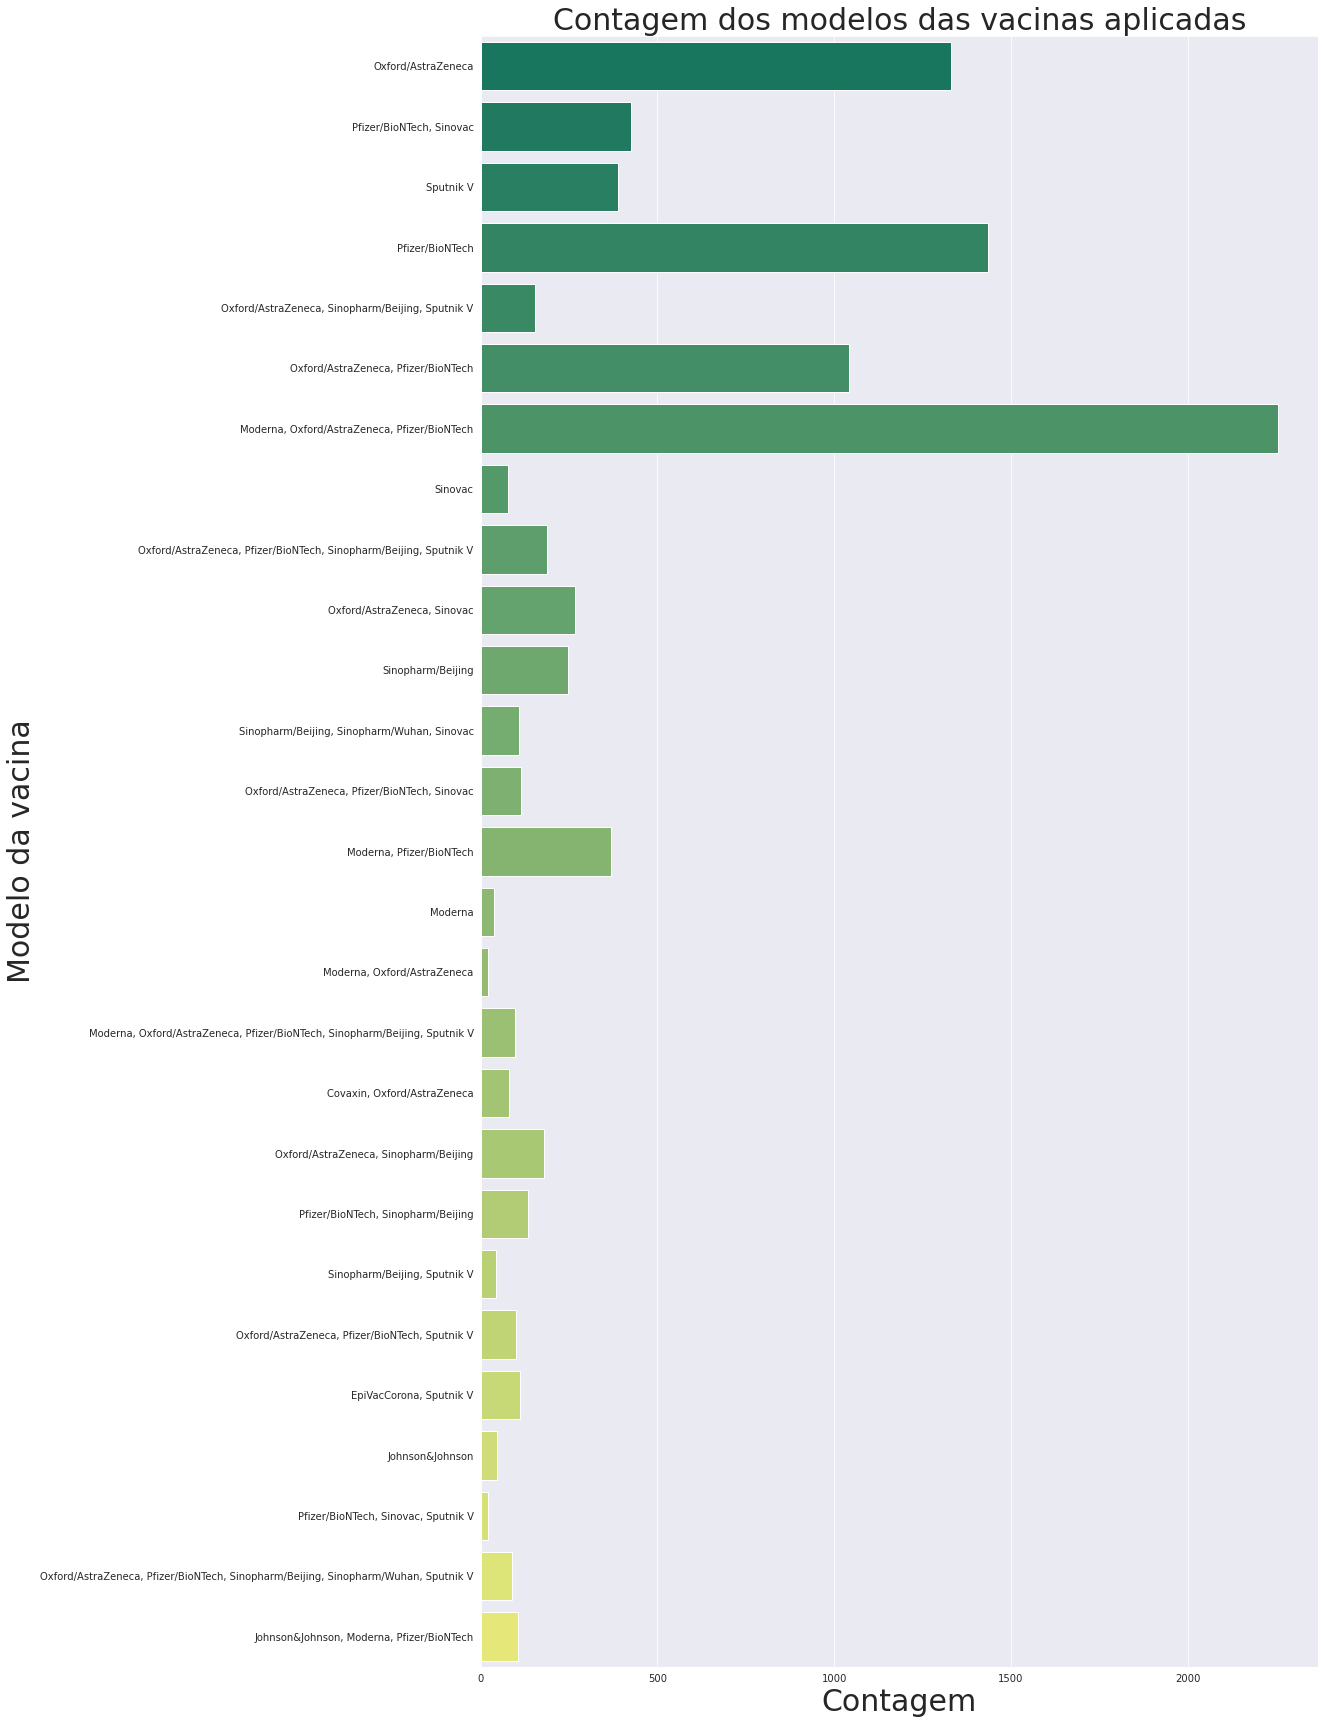

In [34]:
# vaccines count
f, ax = plt.subplots(figsize=(15, 30))
graph = sns.countplot(y='vaccines', data=data, palette='summer')
plt.title('Contagem dos modelos das vacinas aplicadas',fontsize=30)
plt.xlabel('Contagem',fontsize=30)
plt.ylabel('Modelo da vacina', fontsize=30)
plt.show()

# 3.8. Agregações de Dados

In [35]:
# 3.8.1. vaccines vs. countries
print('Modelos de vacinas utilizadas no mundo')
print('---')
vaccines = data.groupby(['country', 'vaccines']).count().reset_index()[['country', 'vaccines']]\
                  .groupby('vaccines').count()['country'].reset_index().sort_values('country', ascending=False)
vaccines.columns = ['Modelo de vacina', 'Número de países que utilizaram']
vaccines

Modelos de vacinas utilizadas no mundo
---


,Modelo de vacina,Número de países que utilizaram
9,Oxford/AstraZeneca,45
6,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",26
18,Pfizer/BioNTech,19
22,Sinopharm/Beijing,10
26,Sputnik V,9
10,"Oxford/AstraZeneca, Pfizer/BioNTech",8
20,"Pfizer/BioNTech, Sinovac",7
8,"Moderna, Pfizer/BioNTech",5
17,"Oxford/AstraZeneca, Sinovac",5
15,"Oxford/AstraZeneca, Sinopharm/Beijing",3


Text(0, 0.5, 'Número de vacinações (em milhões)')

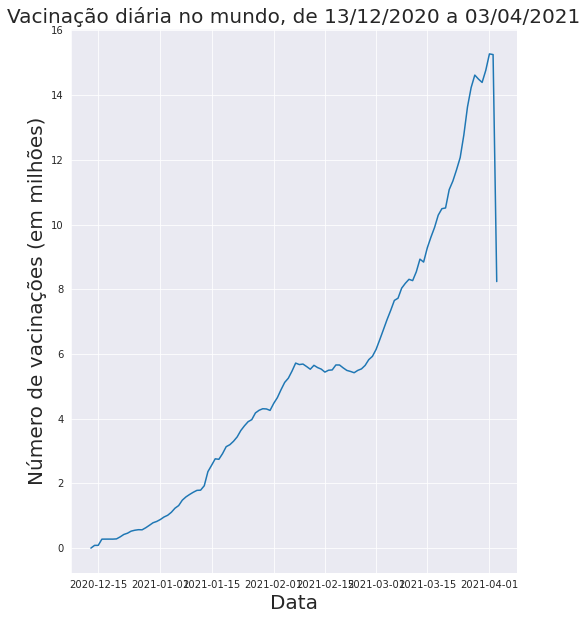

In [36]:
# 3.8.2. daily vaccination
daly_total_vaccinations = data.groupby(['date'])['daily_vaccinations'].sum().reset_index()

# vaccinations in millions
daly_total_vaccinations['daily_vaccinations'] = daly_total_vaccinations['daily_vaccinations'] / 1000000

start_vaccination = daly_total_vaccinations['date'].min().strftime("%d/%m/%Y")
end_vaccination = daly_total_vaccinations['date'].max().strftime("%d/%m/%Y")

graph_title = 'Vacinação diária no mundo, de %s a %s' % (start_vaccination, end_vaccination)

f, ax = plt.subplots(figsize=(8, 10))
plt.title(graph_title,fontsize=20)

sns.lineplot(x="date", y="daily_vaccinations",
             data=daly_total_vaccinations)

plt.xlabel('Data',fontsize=20)
plt.ylabel('Número de vacinações (em milhões)', fontsize=20)

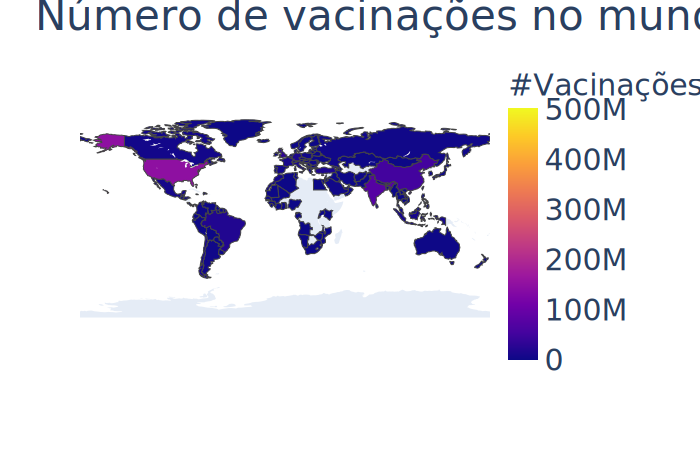

In [37]:
# 3.8.3. total vaccinations vs. countries
data_country = data[['daily_vaccinations_raw', 'country']].copy()
data_country.rename(index=str, columns={'daily_vaccinations_raw': '#Vacinações'}, inplace=True)

data_by_country = data_country.groupby(by=['country']).sum()
data_by_country.loc['Grand Total'] = data_by_country.sum()

data_by_country = data_by_country.reset_index(level=0)

fig = px.choropleth(
         data_by_country,
         locations='country',
         color='#Vacinações',
         locationmode='country names'
)

fig.update_layout(
    title_text='Número de vacinações no mundo',
    showlegend=False,

    geo=dict(
       showframe=False,
       showcoastlines=False,
       projection_type='equirectangular'
    ),
       font=dict(size=30)
)
fig.show() # for interactive map -> change to: fig.show() 

In [38]:
# 3.8.4. TOP 10 countries that vaccinate more
print('TOP 10 países com relação ao número de vacinações realizadas')
print('---')
data_by_country_top10 = data_by_country.iloc[:157:]
print(data_by_country_top10.sort_values('#Vacinações', ascending=False).head(10))

TOP 10 países com relação ao número de vacinações realizadas
---
     country  #Vacinações
149      USA  149119564.0
63     India   75515334.0
29     China   53341000.0
148       UK   33912876.0
21    Brazil   19976713.0
147   Turkey   16306318.0
50   Germany   14350098.0
70     Italy   10983156.0
28     Chile   10784521.0
46    France   10445522.0


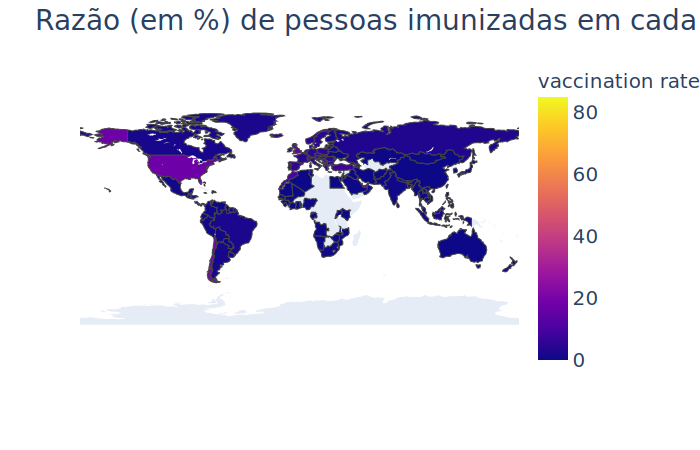

In [39]:
# 3.8.5. vaccination rate
data_vaccination_rate = data[['people_fully_vaccinated_per_hundred', 'country']].copy()
data_vaccination_rate.rename(index=str, columns={'people_fully_vaccinated_per_hundred': 'vaccination rate'}, inplace=True)

data_vaccination_rate = data_vaccination_rate.groupby(by=['country']).max().reset_index(level=0)

fig = px.choropleth(
         data_vaccination_rate,
         locations='country',
         color='vaccination rate',
         locationmode='country names'
)

fig.update_layout(
    title_text='Razão (em %) de pessoas imunizadas em cada país',
    showlegend=False,

    geo=dict(
       showframe=False,
       showcoastlines=False,
       projection_type='equirectangular'
    ),
       font=dict(size=20)
)
fig.show('svg')  # for interactive map -> change to: fig.show() 

In [40]:
# 3.8.6. TOP 10 countries based on vaccination rate
print('TOP 10 países: razão entre pessoas imunizadas e o número de habitantes')
print('---')
print(data_vaccination_rate.sort_values('vaccination rate', ascending=False).head(10))

TOP 10 países: razão entre pessoas imunizadas e o número de habitantes
---
                  country  vaccination rate
52              Gibraltar             84.93
69                 Israel             55.63
130            Seychelles             38.60
27         Cayman Islands             30.67
18                Bermuda             24.68
152  United Arab Emirates             22.12
95                 Monaco             21.23
28                  Chile             20.12
68            Isle of Man             18.05
149                   USA             17.90


# 4. Conclusões AED

Ao olhar para os dados numéricos individualmente, podemos perceber o seguinte:

1. Há vacinações diárias na grande maioria dos países estudados.
2. Há aproximadamente 40 milhões de pessoas que foram vacinadas, mas que ainda não estão completamente imunizadas (aguardam pela segunda dose).
3. Temos, desde que o estudo tem sido realizado (13/12/2020), até 03/04/2021, uma média de ~1,1 milhão de pessoas vacinadas no mundo.
4. Existe forte correlação entre as seguintes colunas/features: total de vacinações, pessoas vacinadas, pessoas imunizadas e vacinações diárias. Isso se deve ao fato de o total de vacinações, bem como as pessoas vacinadas (e/ou imunizadas) são alterados conforme se realiza vacinações diárias no mundo.

Com relação aos dados categóricos, temos:

1. Foram estudados 157 países até então.
2. Foram obtidos, até 03/04/2021, registros de 112 datas diferentes (quase 4 meses), sendo que a pandemia foi oficialmente declarada pela OMS, 13 meses atrás (11/03/2020).
3. O dataset estudado possui dados de 98 fontes de informações advindas da web.
4. Todos os modelos de vacinas produzidas para combater o COVID-19 até então foram utilizados no mundo, sendo o modelo Oxford/AstraZeneca o mais utlizado (45 países).
5. Existe uma queda no número de vacinações observada no mês de abril. Para as outras datas, existe uma tendência de crescimento.
6. Dentre os países que mais vacinaram no mundo estão: Estados Unidos, Índia e China.
7. Quando levamos em consideração a população de cada país, temos dentre os países que possuem maior razão de imunizados per capita: Gibraltar (\~30k habitantes), Israel (\~9kk habitantes) e Seicheles (\~100k habitantes).

Por fim, ressalta-se que o dataset estudado não contém, ainda, informações que podem ser úteis para alguns países. Como por exemplo, a China não possui valor correspondente de razão entre o número de imunizados e o número de habitantes - note que há modelos de vacina que precisam de duas doses para realizar a imunização.

# 5. Referências

[Kaggle: COVID-19 World Vaccination Progress](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)

[Wikipedia: COVID-19](https://en.wikipedia.org/wiki/COVID-19)